In [1]:
import os, sys, warnings
import cfgrib

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')

In [2]:
gfs_profile_file = ('/uufs/chpc.utah.edu/common/home/u1070830/' + 
                'code/snow-liquid-ratio/verify/CLNX_12h_delay12_extract_gfs_ISO.pd')

In [3]:
era_profile_file = ('/uufs/chpc.utah.edu/common/home/steenburgh-group10/' + 
                     'mewessler/era5/profiles/era5prof_40.50N_111.75W.nc')

In [4]:
gfs_profile = pd.read_pickle(gfs_profile_file)
gfs_profile.head()

,T_400,T_450,T_500,T_550,T_600,T_650,T_700,T_750,T_800,T_850,...,V100M,MSL,CAPE,SP,swe_mm,BLH,DIR10M,SPD10M,DIR100M,SPD100M
time,,,,,,,,,,,,,,,,,,,,,
2015-01-15 15:00:00,242.899994,250.100006,256.500000,262.200012,267.000000,270.600006,272.500000,271.799988,269.600006,272.700012,...,0.51,103223.421875,0.0,79931.679688,0.0,21.040001,101.768288,1.716071,105.736137,1.880479
2015-01-15 18:00:00,242.899994,250.199997,256.700012,262.399994,267.299988,271.100006,273.299988,273.299988,272.000000,275.200012,...,0.93,103163.046875,0.0,79990.484375,0.0,62.000000,108.043411,1.388272,118.681252,1.937756
2015-01-15 21:00:00,243.100006,250.399994,256.700012,262.299988,267.200012,271.200012,273.399994,273.799988,274.700012,277.899994,...,1.35,102743.140625,0.0,79813.304688,0.0,54.000000,153.434952,0.939149,148.109161,1.590001
2015-01-16 00:00:00,243.100006,250.000000,256.299988,261.899994,266.700012,270.600006,273.000000,274.299988,274.700012,277.799988,...,2.43,102764.148438,0.0,79811.828125,0.0,22.000000,156.849121,1.576991,161.777527,2.558300
2015-01-16 03:00:00,242.699997,249.800003,256.000000,261.700012,266.600006,270.500000,272.700012,273.799988,272.200012,275.399994,...,1.75,102909.421875,0.0,79816.960938,0.0,21.040001,109.093491,1.925954,136.684677,2.405203


In [5]:
era_profile = xr.open_dataset(era_profile_file)
iso_vars = [k for k in era_profile.data_vars if 'level' in era_profile[k].coords]

data, labels = [], []
for k in iso_vars:
    for l in era_profile.level:
        nk = '%s_%d'%(k, l)
        labels.append(nk)
        data.append(era_profile[k].sel(level=l).values)
        
data = np.array(data).T
index = era_profile.time.values
era_profile = pd.DataFrame(data, columns=labels, index=index)

In [6]:
era_keys = [k for k in era_profile if (('max' not in k) & ('min' not in k))]

era_profile = era_profile[era_keys].rename(
    columns={k:k.replace('_mean', '') for k in era_keys})

era_profile.head()

,Q_200,Q_225,Q_250,Q_300,Q_350,Q_400,Q_450,Q_500,Q_550,Q_600,...,R_775,R_800,R_825,R_850,R_875,R_900,R_925,R_950,R_975,R_1000
1980-01-01 00:00:00,0.000008,0.000023,0.000032,0.000092,0.000222,0.000439,0.000711,0.001245,0.001825,0.002154,...,45.722549,46.027443,45.495766,54.893528,55.165611,55.223152,55.168373,55.164822,55.103477,55.213058
1980-01-01 01:00:00,0.000008,0.000022,0.000033,0.000089,0.000219,0.000437,0.000633,0.001101,0.001813,0.002361,...,47.572777,47.267876,47.729454,55.333138,55.295177,55.355560,55.307056,55.212040,55.157967,55.253105
1980-01-01 02:00:00,0.000007,0.000021,0.000033,0.000088,0.000219,0.000420,0.000514,0.000976,0.001773,0.002376,...,49.819927,48.994678,49.130501,55.579552,55.347439,55.345619,55.346703,55.238991,55.209038,55.224312
1980-01-01 03:00:00,0.000007,0.000022,0.000034,0.000084,0.000223,0.000415,0.000457,0.000796,0.001677,0.002442,...,53.336693,52.144669,51.574329,57.981361,57.558941,57.498806,57.508400,57.455391,57.425743,57.421719
1980-01-01 04:00:00,0.000007,0.000022,0.000036,0.000087,0.000215,0.000410,0.000472,0.000786,0.001618,0.002470,...,57.352180,55.586021,54.458134,61.300995,60.751915,60.640545,60.652237,60.615475,60.567253,60.535820


In [7]:
overlap_keys = era_profile.keys()[np.isin(era_profile.keys(), gfs_profile.keys())]
print(overlap_keys)

gfs_profile = gfs_profile[overlap_keys]
era_profile = era_profile[overlap_keys]

Index(['T_400', 'T_450', 'T_500', 'T_550', 'T_600', 'T_650', 'T_700', 'T_750',
       'T_800', 'T_850',
       ...
       'R_650', 'R_700', 'R_750', 'R_800', 'R_850', 'R_900', 'R_925', 'R_950',
       'R_975', 'R_1000'],
      dtype='object', length=105)


In [8]:
gfs_time_sel = gfs_profile.index[np.in1d(gfs_profile.index, era_profile.index)]
era_time_sel = era_profile.index[np.in1d(era_profile.index, gfs_profile.index)]

In [9]:
gfs_profile = gfs_profile.loc[gfs_time_sel, :]
gfs_profile.head()

,T_400,T_450,T_500,T_550,T_600,T_650,T_700,T_750,T_800,T_850,...,R_650,R_700,R_750,R_800,R_850,R_900,R_925,R_950,R_975,R_1000
time,,,,,,,,,,,,,,,,,,,,,
2015-01-15 15:00:00,242.899994,250.100006,256.500000,262.200012,267.000000,270.600006,272.500000,271.799988,269.600006,272.700012,...,12.3,16.299999,34.500000,54.200001,54.200001,54.200001,54.200001,54.200001,54.200001,54.200001
2015-01-15 18:00:00,242.899994,250.199997,256.700012,262.399994,267.299988,271.100006,273.299988,273.299988,272.000000,275.200012,...,9.4,13.000000,25.299999,78.599998,78.599998,78.599998,78.599998,78.599998,78.599998,78.599998
2015-01-15 21:00:00,243.100006,250.399994,256.700012,262.299988,267.200012,271.200012,273.399994,273.799988,274.700012,277.899994,...,8.0,12.500000,22.799999,73.500000,73.500000,73.500000,73.500000,73.500000,73.500000,73.500000
2015-01-16 00:00:00,243.100006,250.000000,256.299988,261.899994,266.700012,270.600006,273.000000,274.299988,274.700012,277.799988,...,8.3,12.300000,23.100000,62.799999,62.799999,62.799999,62.799999,62.799999,62.799999,62.799999
2015-01-16 03:00:00,242.699997,249.800003,256.000000,261.700012,266.600006,270.500000,272.700012,273.799988,272.200012,275.399994,...,5.9,12.100000,29.200001,55.500000,55.500000,55.500000,55.500000,55.500000,55.500000,55.500000


In [10]:
era_profile = era_profile.loc[era_time_sel, :]
era_profile.head()

,T_400,T_450,T_500,T_550,T_600,T_650,T_700,T_750,T_800,T_850,...,R_650,R_700,R_750,R_800,R_850,R_900,R_925,R_950,R_975,R_1000
2015-01-15 15:00:00,242.585358,249.429337,256.054504,261.844604,266.864563,270.445007,273.248993,273.336975,270.474731,271.601227,...,11.768657,14.187964,27.014132,74.202553,87.118713,91.851746,91.875999,91.751968,91.632469,91.668129
2015-01-15 18:00:00,242.323517,249.336624,256.072327,261.794159,266.782623,270.700073,273.787354,274.278534,271.861755,272.910583,...,8.351256,12.108481,18.120609,49.079098,54.848251,59.202839,59.223251,59.218678,59.215298,59.220036
2015-01-15 21:00:00,242.299225,249.322845,255.839737,261.788330,266.823669,271.071472,274.050232,274.659576,273.195740,274.441101,...,5.577867,12.058819,18.950302,37.239590,44.437771,45.146389,45.186665,45.278763,45.247837,45.107773
2015-01-16 00:00:00,242.571930,249.408203,255.950806,261.824066,266.791565,271.151978,274.369324,276.013184,274.489441,275.900391,...,5.025167,9.316571,19.110231,44.964611,60.637905,62.174629,62.034897,62.074940,62.261375,61.927952
2015-01-16 03:00:00,242.532623,249.323822,255.309052,260.683807,265.703735,270.309814,273.354553,274.552551,273.686340,275.959045,...,7.363478,11.529165,21.669094,46.707214,59.966476,63.781994,63.542801,63.569191,63.744797,63.705891


In [11]:
gfs_profile = gfs_profile.resample('12H', base=9, closed='right', label='right'
                                  ).mean().dropna()
gfs_profile.head()

,T_400,T_450,T_500,T_550,T_600,T_650,T_700,T_750,T_800,T_850,...,R_650,R_700,R_750,R_800,R_850,R_900,R_925,R_950,R_975,R_1000
time,,,,,,,,,,,,,,,,,,,,,
2015-01-15 21:00:00,242.966660,250.233337,256.633331,262.299988,267.166656,270.966675,273.066650,272.966644,272.100006,275.266663,...,9.900000,13.933333,27.533333,68.766663,68.766663,68.766663,68.766663,68.766663,68.766663,68.766663
2015-01-16 09:00:00,243.800003,250.175003,255.924988,261.350006,266.049988,270.075012,272.625000,273.750000,271.500000,274.625000,...,9.000000,12.675000,27.625000,62.500000,62.500000,62.500000,62.500000,62.500000,62.500000,62.500000
2015-01-16 21:00:00,245.500000,251.750000,256.725006,260.875000,264.649994,268.399994,272.250000,273.350006,271.774994,274.924988,...,49.799999,24.850000,27.049999,67.974998,67.974998,67.974998,67.974998,67.974998,67.974998,67.974998
2015-01-17 09:00:00,243.024994,249.425003,254.449997,258.200012,261.200012,264.000000,267.399994,271.399994,273.075012,276.250000,...,78.875000,81.224998,60.675003,62.724998,62.724998,62.724998,62.724998,62.724998,62.724998,62.724998
2015-01-17 21:00:00,243.800003,249.949997,254.800003,259.475006,263.725006,266.924988,268.674988,270.100006,271.774994,274.950012,...,4.100000,19.925001,47.900002,70.250000,70.250000,70.250000,70.250000,70.250000,70.250000,70.250000


In [12]:
era_profile = era_profile.resample('12H', base=9, closed='right', label='right'
                                  ).mean().dropna()
era_profile.head()

,T_400,T_450,T_500,T_550,T_600,T_650,T_700,T_750,T_800,T_850,...,R_650,R_700,R_750,R_800,R_850,R_900,R_925,R_950,R_975,R_1000
2015-01-15 21:00:00,242.402695,249.362930,255.988861,261.809021,266.823608,270.738861,273.695526,274.091705,271.844086,272.984314,...,8.565927,12.785089,21.361681,53.507080,62.134911,65.400322,65.428635,65.416473,65.365204,65.331978
2015-01-16 09:00:00,243.644257,249.850067,255.576508,261.032318,265.806549,270.166931,273.433380,275.048279,273.637024,276.161774,...,8.944249,12.050169,20.486315,48.646652,64.142754,67.236351,67.082924,67.070244,67.299072,67.226624
2015-01-16 21:00:00,245.534012,252.464844,257.133057,260.893066,264.533234,268.383728,272.267242,274.200562,275.165649,276.889587,...,44.615067,24.736259,27.714424,48.623070,61.158962,62.168034,62.126900,62.079189,62.161232,62.184219
2015-01-17 09:00:00,242.933762,249.030396,253.451508,257.068329,260.714691,263.770935,267.220215,271.411011,274.624390,277.524689,...,62.221123,71.818497,65.777405,56.644257,56.767410,56.774361,56.760937,56.647820,56.488243,56.627071
2015-01-17 21:00:00,242.580551,249.082245,254.260513,258.797089,263.662811,267.442474,268.907288,269.506866,271.377869,274.518982,...,2.738771,7.825626,35.406101,80.357811,73.822075,75.011032,75.064842,74.812202,74.834587,74.924957


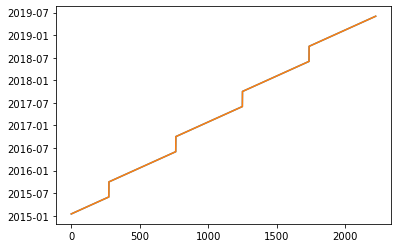

In [16]:
plt.plot(era_profile.index)
plt.plot(gfs_profile.index)

In [13]:
unique_keys = np.unique([k.split('_')[0] for k in overlap_keys])
unique_keys

array(['R', 'T', 'U', 'V', 'VO', 'W', 'Z'], dtype='<U2')

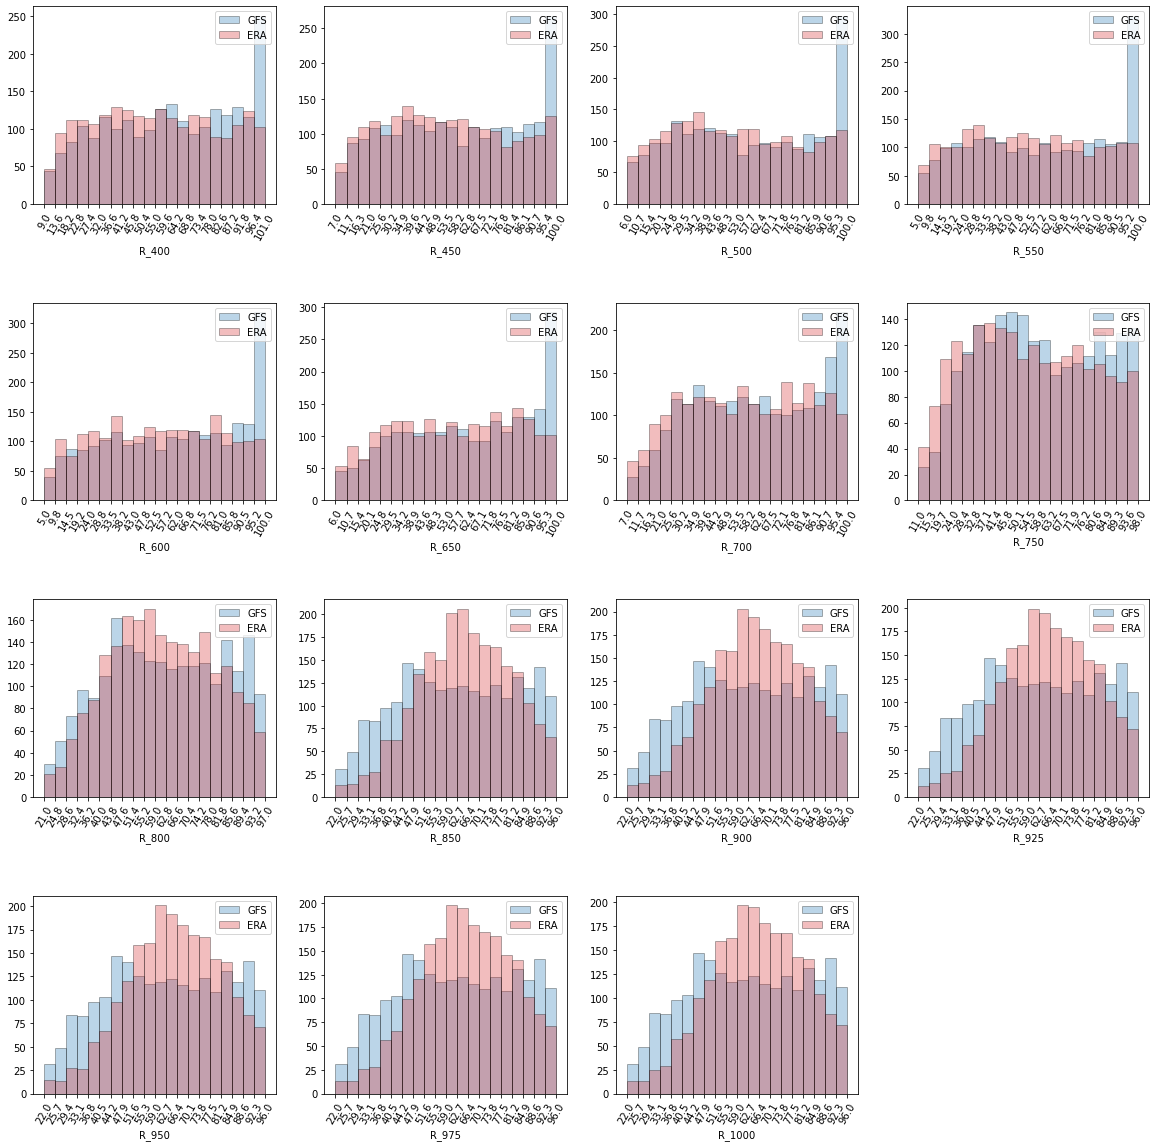

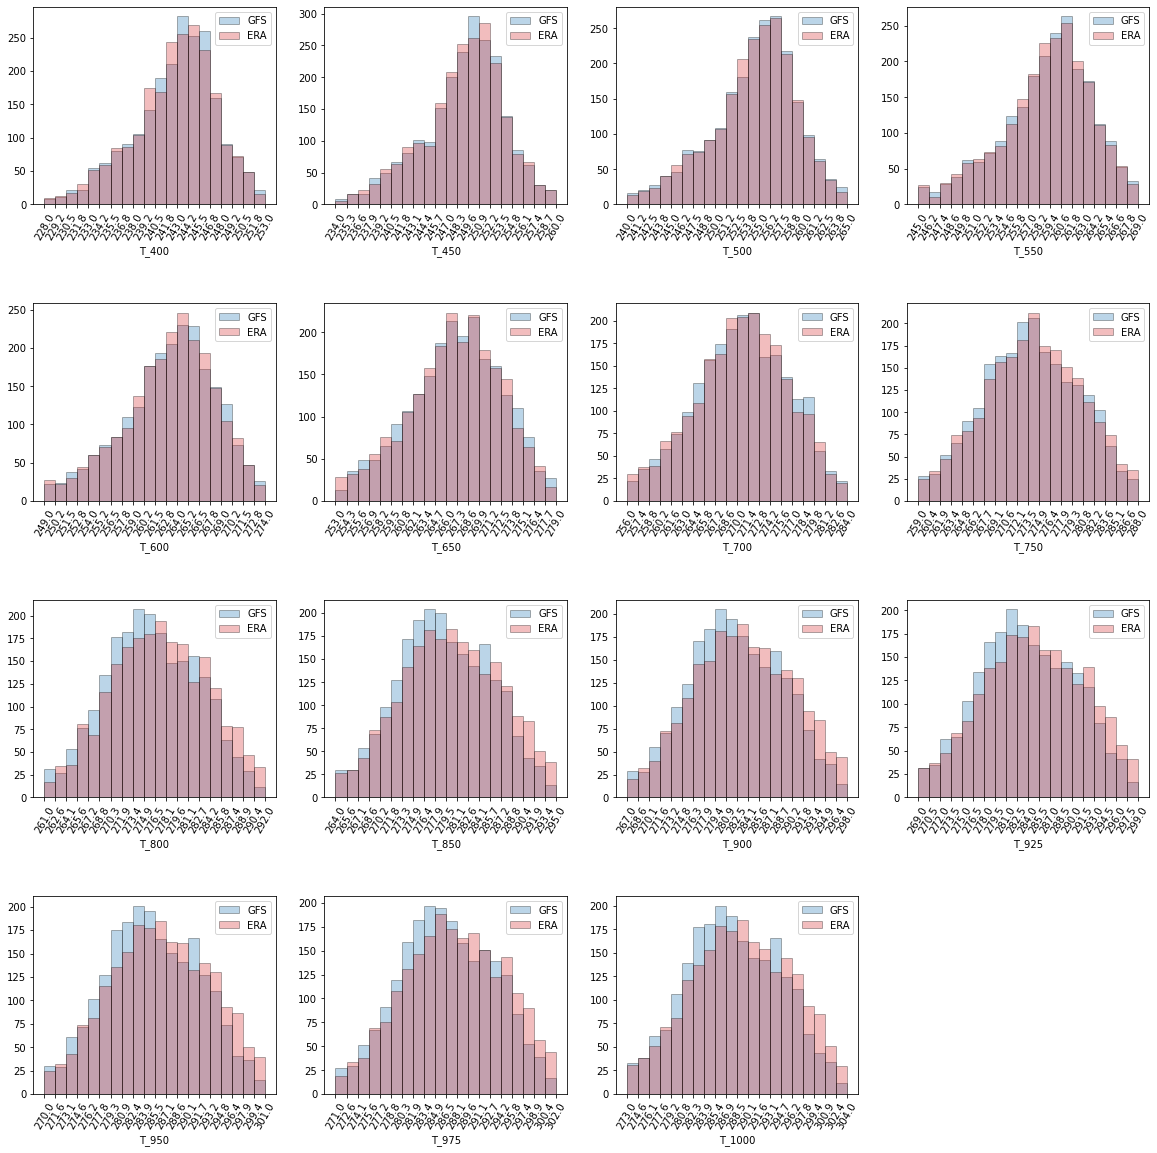

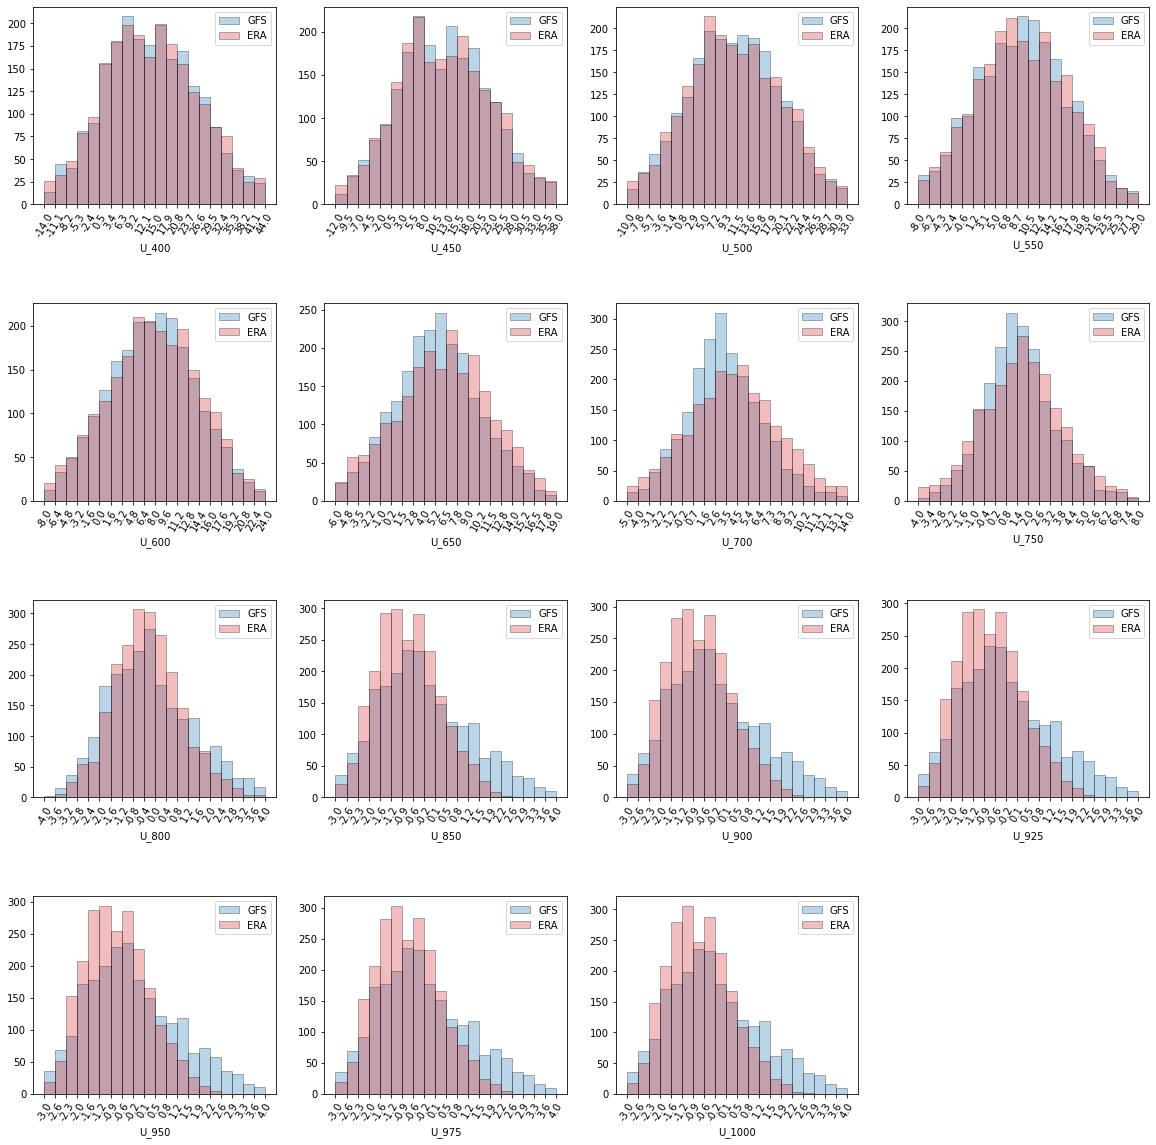

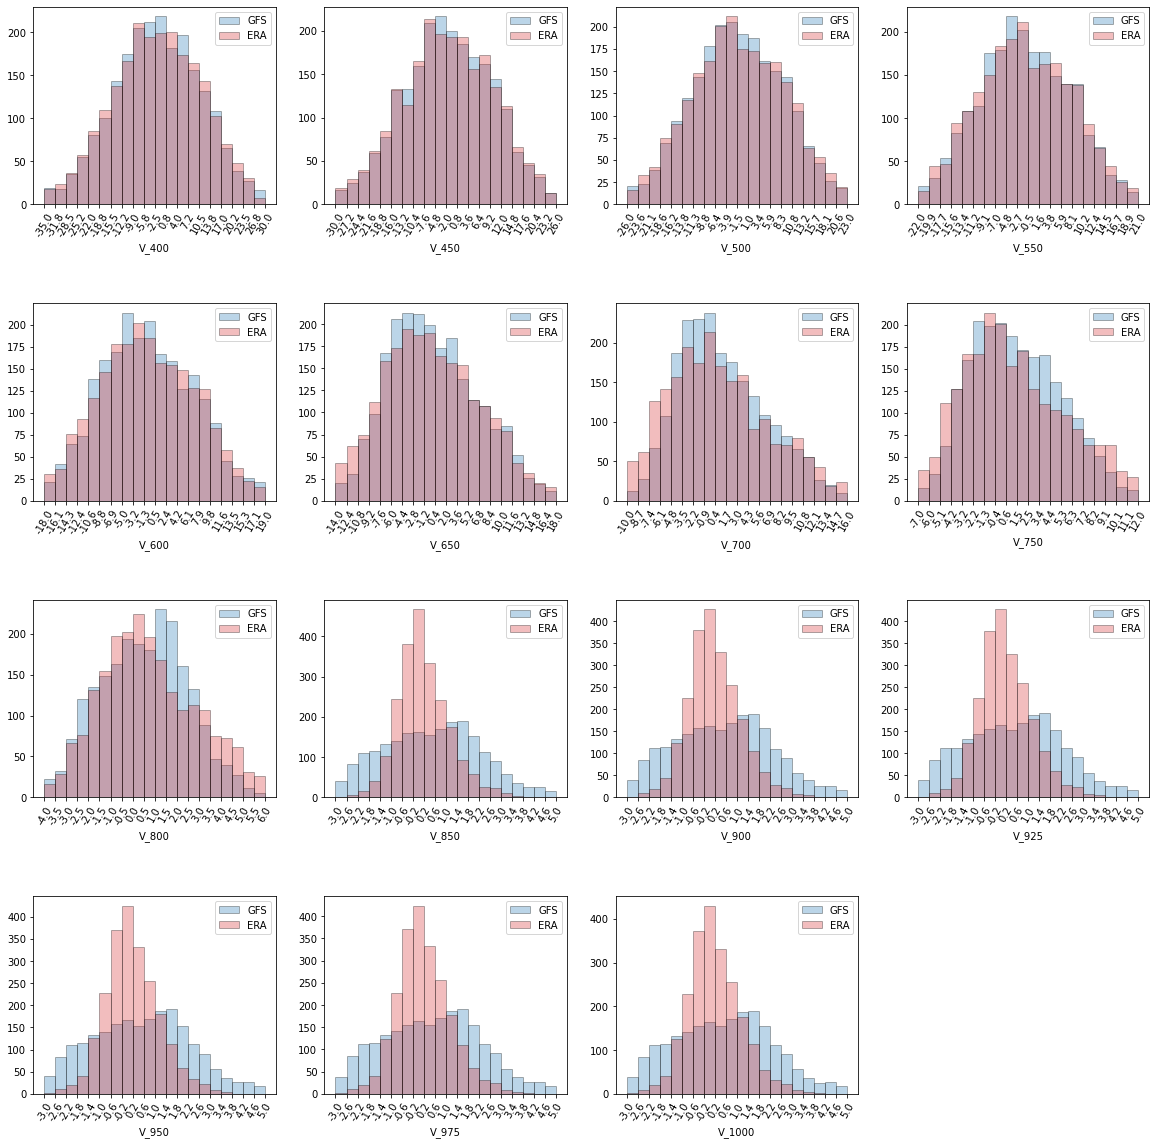

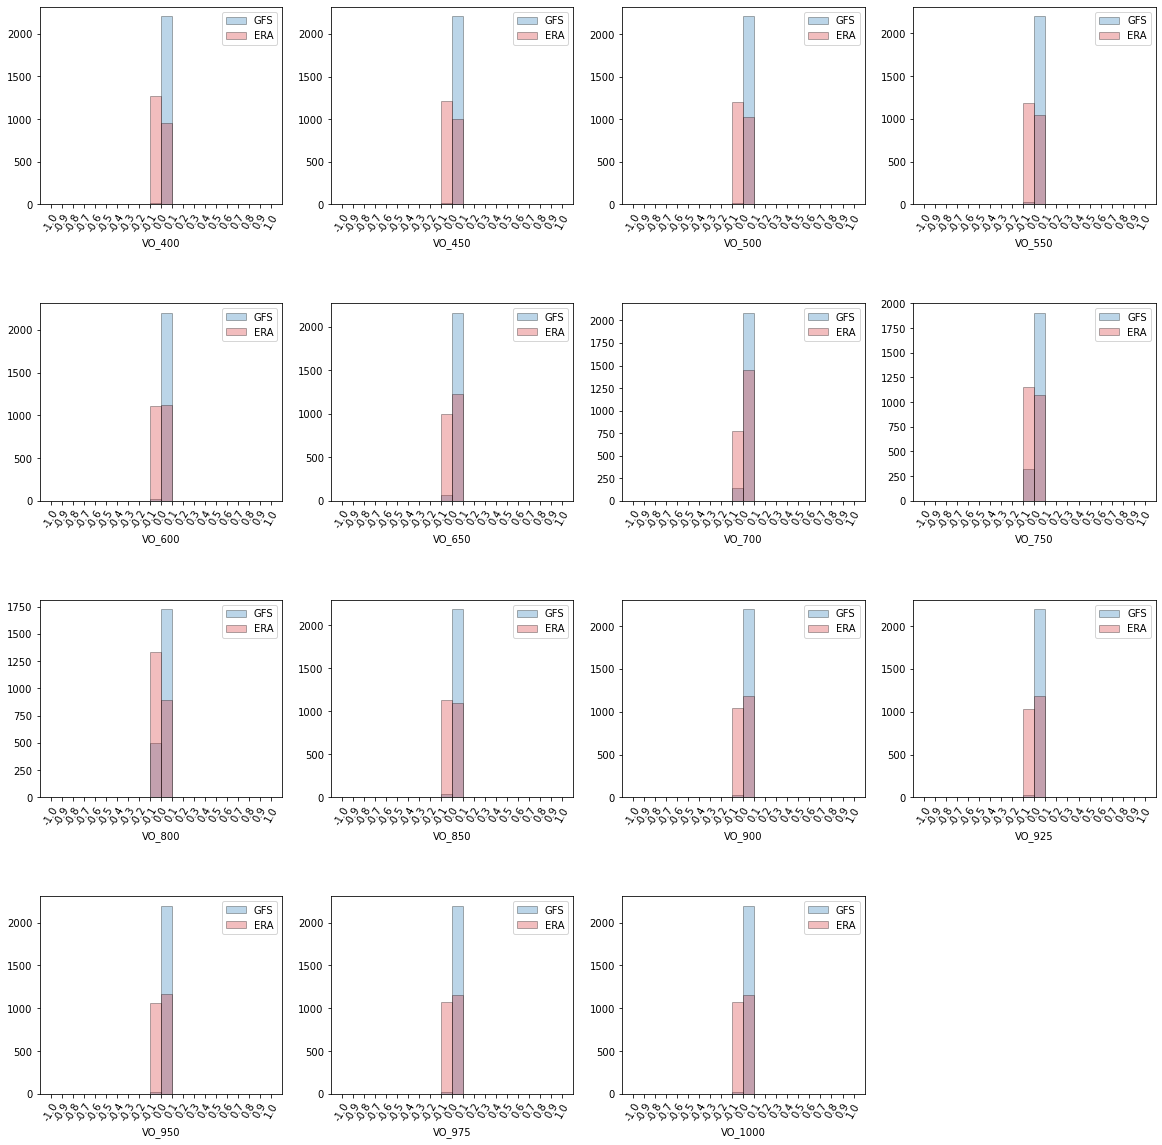

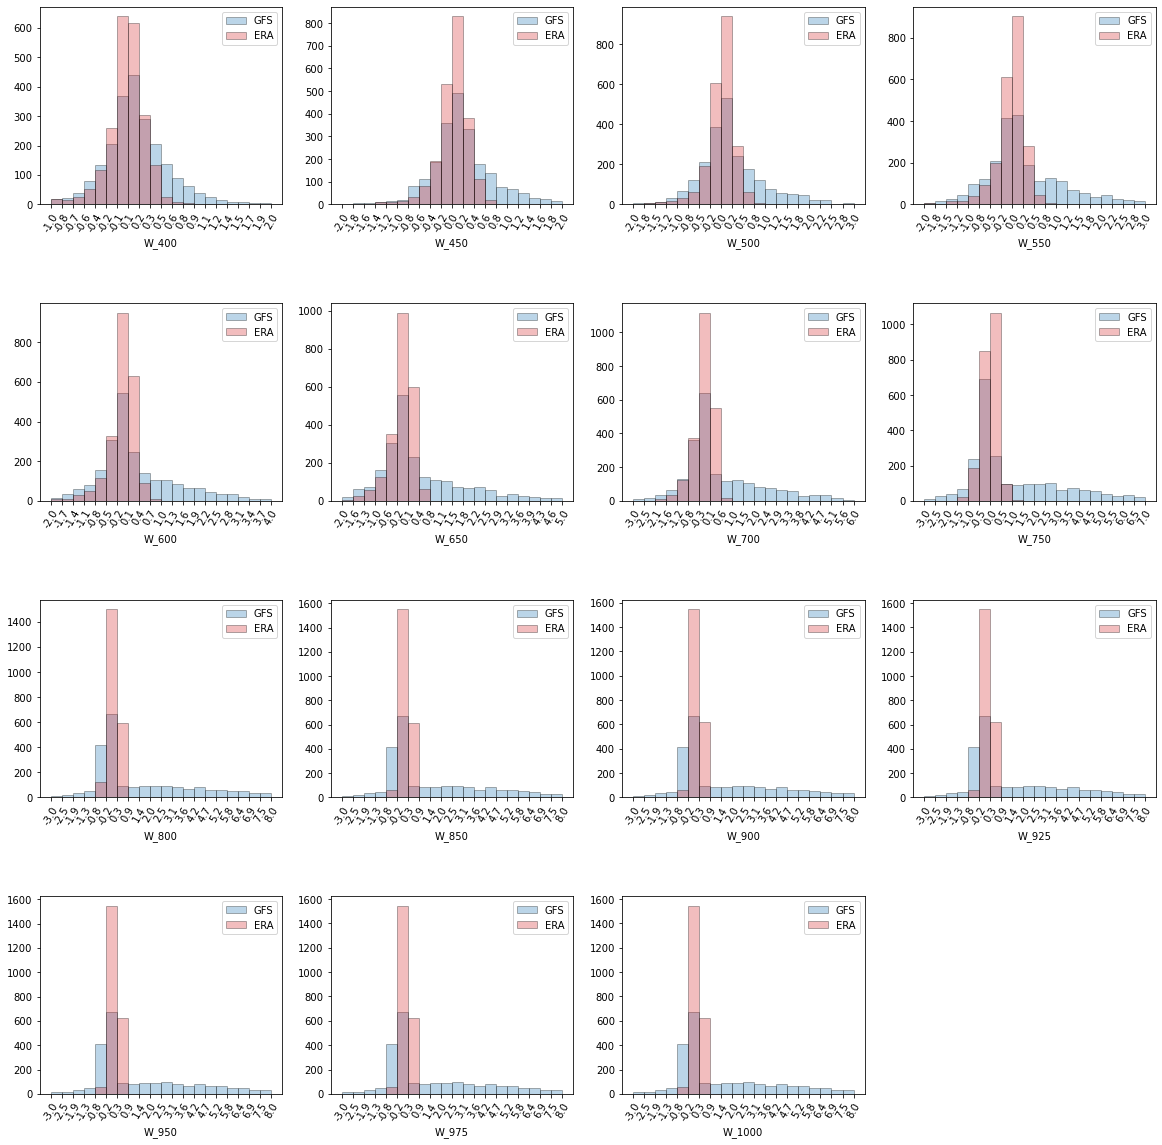

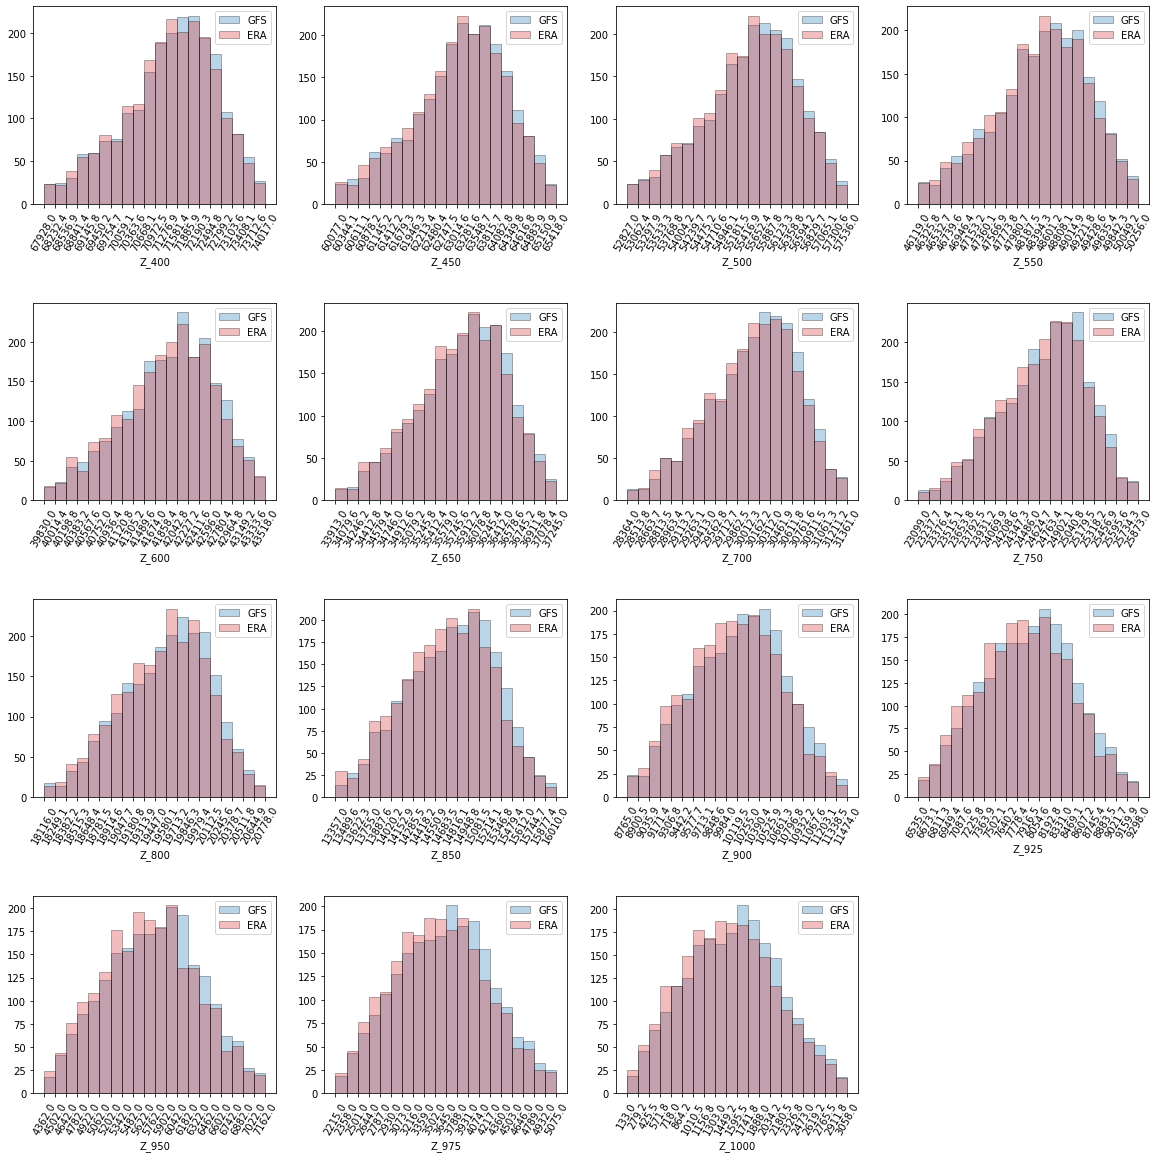

In [15]:
for uk in unique_keys:
    level_keys = [k for k in overlap_keys if k.split('_')[0] == uk]
    
    fig, axs = plt.subplots(4, 4, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5)
    axs = axs.flatten()
    
    for ax, level_key in zip(axs, level_keys):
                
        gfs_vals = gfs_profile[level_key].values
        era_vals = era_profile[level_key].values
        
        if uk == 'Z':
            gfs_vals = gfs_vals*9.81
        
        minval, maxval = np.percentile(np.append(gfs_vals, era_vals), [1, 99])
        bins = np.linspace(np.floor(minval), np.ceil(maxval), 21)
        
        hist_args = dict(
            bins=bins,
            edgecolor='k',
            alpha=0.3,)
        
        ax.hist(gfs_vals, color='C0', label='GFS', **hist_args)
        ax.hist(era_vals, color='C3', label='ERA', **hist_args)

        ax.set_xticks(bins)
        ax.set_xticklabels(['%.1f'%b for b in bins], rotation=60)
        ax.set_xlabel(level_key)
        
        ax.legend(loc='upper right')
        
    axs[-1].axis('off')

    plt.show()